## House Prices - Using Advanced Regression Techniques

## Goal
To predict the sales price for each house.

### Data Description

##### train.csv - the training set
##### test.csv - the test set
##### data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
##### sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

## Load the required libraries

In [1]:
## imports 

import pandas as pd 
import seaborn as sns
import numpy as np 
import  statsmodels.api as sm
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

## Data Loading

In [30]:
df = pd.read_csv("test.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [3]:
df1 = pd.read_csv("train.csv")
df1.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df2 = pd.read_csv("sample_submission.csv")
df2.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


## Overview of dataset

In [ ]:
# Number of rows and columns (Train test csv file)
print(df.shape)      

(1459, 80)


In [6]:
print(df2.shape)      

(1459, 2)


### Merge Datasets

In [ ]:
# Merge df and df2 datasets (df-train test & df2-sample_submission)

merged_df = pd.merge(df, df2, on=['Id'], how='inner')
print(merged_df.shape)



(1459, 81)


In [8]:
# Saving the merged dataset
merged_path = r'G:\My Drive\Phase_3_Data_Science\merged_data.csv'
merged_df.to_csv(merged_path, index=False)
print(f"Merged dataset saved to {merged_path}")

Merged dataset saved to G:\My Drive\Phase_3_Data_Science\merged_data.csv


In [9]:
# Check the data structure
print(merged_df.info())         

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [10]:
# Summary statistics for numerical columns
print(merged_df.describe())

                Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000  ...   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704  ...   
std       1.113740    30.390071     21.130467   177.625900   455.268042  ...   
min 

### Data types

In [11]:
print(merged_df.dtypes)

# Count unique values for categorical variables
categorical_columns = merged_df.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    print(f"{col}: {merged_df[col].nunique()} unique values")

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 81, dtype: object
MSZoning: 5 unique values
Street: 2 unique values
Alley: 2 unique values
LotShape: 4 unique values
LandContour: 4 unique values
Utilities: 1 unique values
LotConfig: 5 unique values
LandSlope: 3 unique values
Neighborhood: 25 unique values
Condition1: 9 unique values
Condition2: 5 unique values
BldgType: 5 unique values
HouseStyle: 7 unique values
RoofStyle: 6 unique values
RoofMatl: 4 unique values
Exterior1st: 13 unique values
Exterior2nd: 15 unique values
MasVnrType: 4 unique values
ExterQual: 4 unique values
ExterCond: 5 unique values
Foundation: 6 unique values
BsmtQual: 4 unique values
BsmtCond: 4 unique values
BsmtExposure: 4 unique values
BsmtFinType1: 6 unique values
BsmtFinType2: 

### Check for Missing Values

In [12]:
# Count missing values per column
print(merged_df.isnull().sum())  


Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [13]:
# Proportion of missing values per column
print(merged_df.isnull().mean()) 

Id               0.000000
MSSubClass       0.000000
MSZoning         0.002742
LotFrontage      0.155586
LotArea          0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000685
SaleCondition    0.000000
SalePrice        0.000000
Length: 81, dtype: float64


In [14]:
# Frequency count of each category
for col in categorical_columns:
    print(merged_df[col].value_counts())
    print("\n")

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64


Pave    1453
Grvl       6
Name: Street, dtype: int64


Grvl    70
Pave    37
Name: Alley, dtype: int64


Reg    934
IR1    484
IR2     35
IR3      6
Name: LotShape, dtype: int64


Lvl    1311
HLS      70
Bnk      54
Low      24
Name: LandContour, dtype: int64


AllPub    1457
Name: Utilities, dtype: int64


Inside     1081
Corner      248
CulDSac      82
FR2          38
FR3          10
Name: LotConfig, dtype: int64


Gtl    1396
Mod      60
Sev       3
Name: LandSlope, dtype: int64


NAmes      218
OldTown    126
CollgCr    117
Somerst     96
Edwards     94
NridgHt     89
Gilbert     86
Sawyer      77
SawyerW     66
Mitchel     65
NWAmes      58
IDOTRR      56
Crawfor     52
BrkSide     50
Timber      34
NoRidge     30
StoneBr     26
SWISU       23
MeadowV     20
ClearCr     16
BrDale      14
NPkVill     14
Veenker     13
Blmngtn     11
Blueste      8
Name: Neighborhood, dtype

### Check for duplicate


In [15]:
# Check for duplicate rows
print(f"Duplicate Rows: {merged_df.duplicated().sum()}")

Duplicate Rows: 0


In [16]:
def find_duplicate_columns(merged_df):
    duplicate_columns = []
    for i in range(len(merged_df.columns)):
        for j in range(i + 1, len(merged_df.columns)):
            if merged_df.iloc[:, i].equals(merged_df.iloc[:, j]):
                duplicate_columns.append((merged_df.columns[i], merged_df.columns[j]))
    return duplicate_columns
# Check for duplicate columns
duplicates = find_duplicate_columns(merged_df)
if duplicates:
    print("Duplicate columns found:")
    for col1, col2 in duplicates:
        print(f" - {col1} is a duplicate of {col2}")
else:
    print("No duplicate columns found.")

No duplicate columns found.


### Checking variables correlation using correlation matrix

In [ ]:
# Compute correlation matrix for numerical features
corr_matrix = merged_df.corr().
print(corr_matrix)

                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.004993     0.009930  0.051492    -0.064887   
MSSubClass     0.004993    1.000000    -0.450505 -0.359537     0.034690   
LotFrontage    0.009930   -0.450505     1.000000  0.644608     0.182870   
LotArea        0.051492   -0.359537     0.644608  1.000000     0.107989   
OverallQual   -0.064887    0.034690     0.182870  0.107989     1.000000   
OverallCond    0.009553   -0.071768    -0.092312 -0.103402    -0.095874   
YearBuilt     -0.058647    0.040848     0.122356  0.048314     0.621910   
YearRemodAdd  -0.079437    0.046319     0.092603  0.036907     0.591267   
MasVnrArea    -0.021424   -0.012186     0.251533  0.188691     0.453991   
BsmtFinSF1    -0.045966   -0.058775     0.204621  0.185470     0.322583   
BsmtFinSF2     0.015862   -0.079093     0.046824  0.054199    -0.028199   
BsmtUnfSF      0.001203   -0.111080     0.092031  0.071681     0.243070   
TotalBsmtSF   -0.039731  

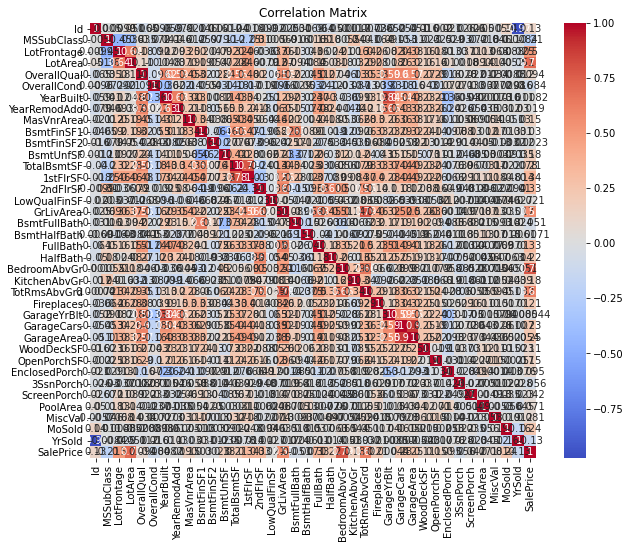

In [18]:
# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Features Selection using Random forest and gradient boosting techniques

In [19]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler



In [20]:
target_column = 'SalePrice'  
X = merged_df.drop(columns=[target_column]) 
y = merged_df[target_column]                

# Handle missing values (if any)
X.fillna(X.median(), inplace=True)

# Convert categorical variables to dummy variables (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

In [21]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
# Initialize the model (Random Forest or Gradient Boosting)
model = RandomForestRegressor(random_state=42, n_estimators=100)
# model = GradientBoostingRegressor(random_state=42, n_estimators=100)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict and evaluate on the test set
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse:.2f}")

# Calculate feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the most significant variables
print("Top Significant Features:")
print(feature_importances.head(10))

Root Mean Squared Error: 2948.05
Top Significant Features:
         Feature  Importance
21  BedroomAbvGr    0.605457
3        LotArea    0.341649
35        MoSold    0.024095
0             Id    0.003091
2    LotFrontage    0.002401
13      1stFlrSF    0.001909
23  TotRmsAbvGrd    0.001402
16     GrLivArea    0.001370
27    GarageArea    0.001181
12   TotalBsmtSF    0.001114


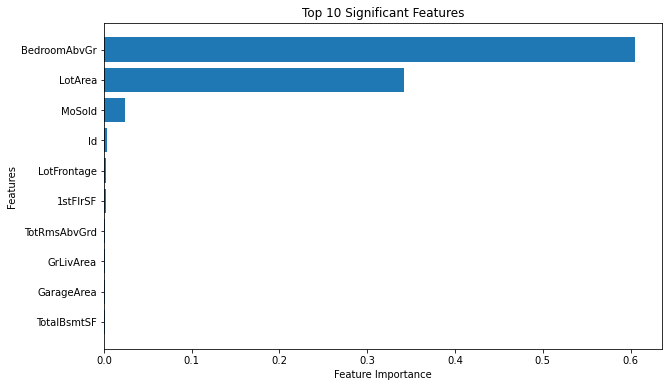

In [23]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'].head(10), feature_importances['Importance'].head(10))
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Significant Features')
plt.gca().invert_yaxis()
plt.show()

## Features Selection using Lasso (L1 regularization) and Ridge (L2 regularization) regression

In [24]:
# Prepare the data
target_column = 'SalePrice'  
X = merged_df.drop(columns=[target_column])  
y = merged_df[target_column]               

# Handle missing values (if any)
X.fillna(X.median(), inplace=True)

# Convert categorical variables to dummy variables (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for Lasso and Ridge)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
lasso = Lasso(alpha=0.1, random_state=42)  # Adjust alpha for regularization strength
ridge = Ridge(alpha=1.0, random_state=42)  # Adjust alpha for regularization strength

# Fit Lasso and Ridge models
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

# Predict and evaluate
lasso_pred = lasso.predict(X_test)
ridge_pred = ridge.predict(X_test)

lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))

print(f"Lasso RMSE: {lasso_rmse:.2f}")
print(f"Ridge RMSE: {ridge_rmse:.2f}")


Lasso RMSE: 11.80
Ridge RMSE: 35.04


#### Ascertain the Most significant feaures

In [25]:
# # # Extract significant features from Lasso
# lasso_coefficients = pd.DataFrame({
#     'Feature': merged_df.drop(columns=[target_column]).columns,
#     'Coefficient': lasso.coef_
# }).sort_values(by='Coefficient', ascending=False)

# print("Top Features Selected by Lasso:")
# print(lasso_coefficients[lasso_coefficients['Coefficient'] != 0].head(10))

# # # Extract significant features from Ridge
# # ridge_coefficients = pd.DataFrame({
# #     'Feature': merged_df.drop(columns=[target_column]).columns,
# #     'Coefficient': ridge.coef_
# # }).sort_values(by='Coefficient', ascending=False)

# # print("Top Features Ranked by Ridge:")
# # print(ridge_coefficients.head(10))


#### Using Alpha Tuning for cross-validation

In [26]:
# from sklearn.model_selection import GridSearchCV

# # For Lasso
# lasso_cv = GridSearchCV(Lasso(random_state=42), param_grid={'alpha': [0.01, 0.1, 1, 10]}, cv=5)
# lasso_cv.fit(X_train, y_train)
# print(f"Best Lasso alpha: {lasso_cv.best_params_}")

# # # For Ridge
# # ridge_cv = GridSearchCV(Ridge(random_state=42), param_grid={'alpha': [0.01, 0.1, 1, 10]}, cv=5)
# # ridge_cv.fit(X_train, y_train)
# # print(f"Best Ridge alpha: {ridge_cv.best_params_}")


In [27]:
# from sklearn.linear_model import Lasso

# # Train a Lasso model
# lasso = Lasso(alpha=0.1, random_state=42)
# lasso.fit(X_train, y_train)

# # Extract significant features (non-zero coefficients)
# lasso_importances = pd.DataFrame({
#     'Feature': merged_df.drop(columns=[target_column]).columns,
#     'Coefficient': lasso.coef_
# }).sort_values(by='Coefficient', ascending=False)

# print("Top Features by Lasso:")
# print(lasso_importances[lasso_importances['Coefficient'] != 0].head(10))

### Using Recursive Feature Elimination (RFE)

In [29]:
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LinearRegression

# # Use Linear Regression as the base model
# base_model = LinearRegression()
# rfe = RFE(estimator=base_model, n_features_to_select=10)  # Select top 10 features
# rfe.fit(X_train, y_train)

# # Get selected features
# rfe_selected_features = pd.DataFrame({
#     'Feature': merged_df.drop(columns=[target_column]).columns,
#     'Selected': rfe.support_,
#     'Ranking': rfe.ranking_
# }).sort_values(by='Ranking', ascending=True)

# print("Top Features by RFE:")
# print(rfe_selected_features[rfe_selected_features['Selected']].head(10))
